## Bài 1:

In [83]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [84]:
r = np.random.RandomState(24)
X = np.dot(r.rand(2,2), r.randn(2, 300)).T

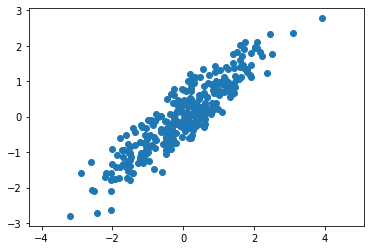

In [85]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [86]:
X.mean()

-0.0015003886467936044

In [88]:
import numpy.matlib 

o= np.matlib.ones((300,2))
mean = o * X.mean()

In [89]:
X_mean = X - mean

In [90]:
X_mean.mean()

7.401486830834377e-18

In [67]:
covar = np.cov(X_mean, rowvar = False)

In [68]:
from scipy import linalg as LA
evals , evecs = LA.eigh(covar)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

In [69]:
evecs

array([[-0.76789621,  0.64057428],
       [-0.64057428, -0.76789621]])

In [70]:
B = evecs[:,:2]
B

array([[-0.76789621,  0.64057428],
       [-0.64057428, -0.76789621]])

In [78]:
Z = X_mean.dot(B)

## Bài 2: Dùng Numpy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
del iris['Id']

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Get list of categorical variables
s = (iris.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Species']


In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    iris[i]=iris[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(iris)

StandardScaler()

In [ ]:
iris2 = iris.copy()

In [ ]:
iris = iris.iloc[:,:4]
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris1 = iris.values

In [ ]:
iris1.mean()

3.4636666666666662

In [ ]:
import numpy.matlib 

one= np.matlib.ones((150,4))

In [ ]:
mean = one * iris1.mean()


### Standard

In [ ]:
from sklearn.preprocessing import StandardScaler
iris1_x1 = StandardScaler().fit_transform(iris1)

In [ ]:
cov1 = np.cov(iris1_x1, rowvar = False)

In [ ]:
cov1

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
from scipy import linalg as LA
evals1 , evecs1 = LA.eigh(cov1)
idx = np.argsort(evals1)[::-1]
evecs1 = evecs1[:,idx]
evals1 = evals1[idx]

In [ ]:
evals1

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
b1 = evecs1[:,:2]
b1

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [ ]:
z1_data = iris1_x1.dot(b1)

In [ ]:
z1_data = pd.DataFrame(z1)

In [ ]:
z1_data.head()

,0,1
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


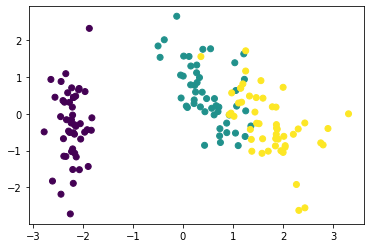

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))

# Vẽ đồ thị
plt.scatter(x=z1_data[0], y = z1_data[1], c = iris2['Species'])

### mean = 0

In [ ]:
iris1_x = iris1 - mean

In [ ]:
iris1_x.mean()

4.736951571734001e-16

In [ ]:
cov = np.cov(iris1_x, rowvar = False)

In [ ]:
cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
from scipy import linalg as LA
evals , evecs = LA.eigh(cov)

In [ ]:
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

In [ ]:
evecs

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [ ]:
evals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
v1 = evecs[:,0]
v2 = evecs[:,1]

In [ ]:
v = v1@v2

In [ ]:
v

2.602931516830051e-16

In [ ]:
b = evecs[:,:2]
b

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [ ]:
z = np.dot(iris1_x, b)

In [ ]:
z.shape

(150, 2)

In [ ]:
z_data = pd.DataFrame(z)

In [ ]:
z_data

,0,1
0,-2.350134,-1.707373
1,-2.381318,-1.211209
2,-2.555747,-1.243420
3,-2.412364,-1.069642
4,-2.394520,-1.714691
...,...,...
145,2.278090,-1.568181
146,1.859737,-1.005745
147,2.098119,-1.459285
148,2.235702,-1.496643


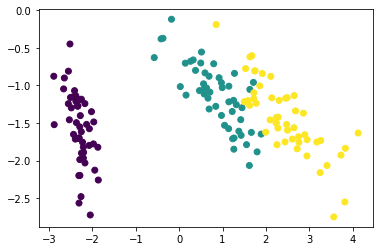

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))

# Vẽ đồ thị
plt.scatter(x=z_data[0], y = z_data[1], c = iris2['Species'])

## Bài 3: Dùng thư viện

In [ ]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(iris)
PCA_iris = pd.DataFrame(pca.transform(iris), columns=(["col1","col2"]))
PCA_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,150.0,3.256654e-16,2.055442,-3.225200,-2.530159,0.553329,1.549463,3.794687
col2,150.0,-5.565918e-16,0.492182,-1.262492,-0.323599,-0.032511,0.328860,1.370524


In [ ]:
PCA_iris

,col1,col2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


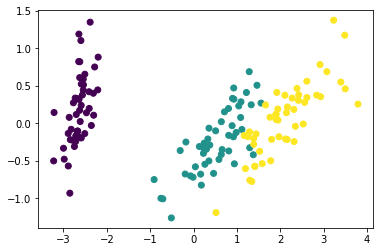

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))

# Vẽ đồ thị
plt.scatter(x=PCA_iris["col1"], y = PCA_iris["col2"], c = iris2['Species'])